# @author : Yassine Jabori

# Part 2 : Audio pre-processing 

# --------------------------------------------------------------------------------------------------

# Importing Models

I choosed to work with librosa becouse it is a powerful Python library built to work with audio and perform analysis on it.It provides the building blocks necessary to create music information retrieval systems.

In [2]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

%matplotlib inline

# EDA

In [105]:
filename = r"C:\Users\yassine\Desktop\groover\part_2_raw_audio\music12.wav"

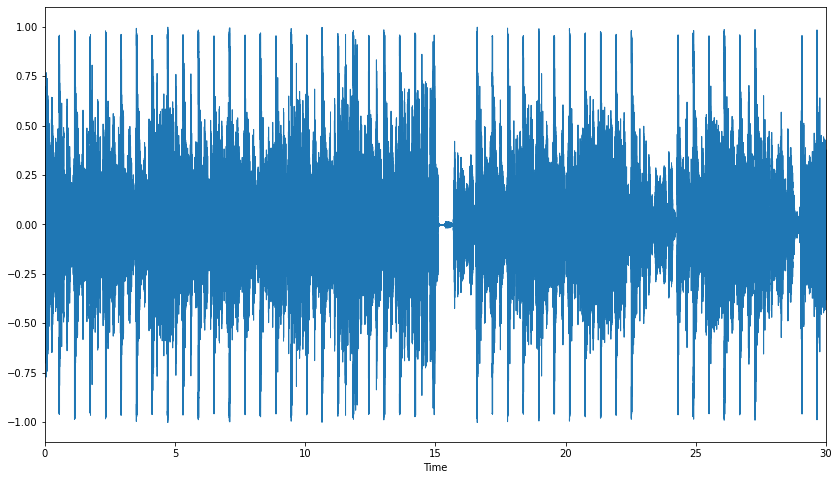

In [106]:
fig = plt.figure(figsize = (14,8))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data,sr = sample_rate)
ipd.Audio(filename)

In [107]:
print("Sample rate : ", sample_rate)       # 22KHz
print(data)              #librosa return nornmalized values
print("lenght of data : ", len(data))

Sample rate :  22050
[-0.1395874  -0.1746521  -0.06533813 ...  0.10778809  0.10632324
  0.10507202]
lenght of data :  661794


# Feature extraction from Audio signal

I will extract features from one sample then I will do the same process on all audios 

### Spectral Centroid

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:



In [108]:
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sample_rate)
print((spectral_centroids).mean())
print((spectral_centroids).var())

2025.565005791413
507423.5778470794


### Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal:




In [109]:
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sample_rate)
print(spectral_rolloff.mean())
print((spectral_rolloff).var())

4537.06088674594
2181404.582004697


### Spectral Bandwidth

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

In [110]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(data, sr=sample_rate)
print(spectral_bandwidth.mean())
print(spectral_bandwidth.var())

2272.735162534201
145435.853225045


### Zero-Crossing Rate

A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.

In [111]:
zero_crossing_rate = librosa.zero_crossings(data, pad=False)
print((zero_crossing_rate).mean())
print((zero_crossing_rate).var())

0.07550536874012155
0.06980430803153978


### Mel-Frequency Cepstral Coefficients(MFCCs)

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

In [112]:
mfccs = librosa.feature.mfcc(data, sr=sample_rate)
print(mfccs.shape)
for i in range(mfccs.shape[0]):
    print(mfccs[i].mean())
    print(mfccs[i].var())

(20, 1293)
-100.609726
5410.0996
110.21587
854.55164
1.0366617
430.8567
38.75178
271.48715
-14.496215
161.16925
20.633469
153.37946
-18.031637
191.32458
12.568233
113.48272
-14.121632
107.00399
15.092575
121.89702
-9.242668
82.14513
11.392888
57.285843
-9.505772
60.71459
8.634793
61.987736
-7.096976
55.18484
2.9906747
53.27212
-4.5080605
60.328415
4.6878686
52.3514
-4.113947
63.05034
-2.7818248
61.38125


### Chroma feature

A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.

librosa.feature.chroma_stft is used for the computation of Chroma features.



In [113]:
chromagram = librosa.feature.chroma_stft(data, sr=sample_rate, hop_length=256)
print(chromagram.mean())
print(chromagram.var())

0.43987864
0.086531706


### RMS Feature
The RMS of a signal follows a similar calculation as the STE method, where RSM is instead the squart root of the mean square (the average of the squares of magnitude of the audio frames).

In [114]:
hop_length = 256
frame_length = 512
rmse = librosa.feature.rms(data, frame_length=frame_length, hop_length=hop_length, center=True)
print(rmse.mean())
print(rmse.var())

0.16639474
0.008690542


### Tempogram:
It is a time pulse representation of an audio signal laid out such that it indicates the variation of pulse strength over time, given a specific time lag or BPM value. The construction of a tempogram can be divided into two parts. First, the onset detection characterizes a series of musical events constituting the basic rhythmic content of the audio. This is followed by the estimation of local tempo using the autocorrelation or Fourier transform of the onset detection function computed over a short time window.   

In [115]:
oenv = librosa.onset.onset_strength(y=data, sr=sample_rate)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sample_rate)
sum(tempogram)

array([35.53336529, 35.74946138, 35.96630524, ..., 75.9669452 ,
       76.14819386, 76.32939272])

In [116]:
harmony, perceptr = librosa.effects.hpss(data)
print(harmony.mean())
print(perceptr.mean())

-4.2240696e-05
-0.0011167226


In [117]:
# Creating a csv file to save extracted data
import csv  

header = ['filename','length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var','spectral_centroid_mean', 'spectral_centroid_var','spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean','rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var','harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo','mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean','mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var','mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean','mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var','mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean','mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var','mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean','mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']

with open('features.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

In [118]:
#extracting informations for audios and saving it in a csv file
import os
folder_name = r"C:\Users\yassine\Desktop\groover\part_2_raw_audio"

for filename in os.listdir(folder_name):
    mfccs_list = []
    print(os.path.join(filename) + " In Process...")
    file = (os.path.join(folder_name, filename))
    data, sample_rate = librosa.load(file)

    spectral_centroids = librosa.feature.spectral_centroid(data, sr=sample_rate)
    rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sample_rate)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(data, sr=sample_rate)
    
    zero_crossing_rate = librosa.zero_crossings(data, pad=False)

    mfccs = librosa.feature.mfcc(data, sr=sample_rate)
    for i in range(mfccs.shape[0]):
        mfccs_list.append(mfccs[i].mean())
        mfccs_list.append(mfccs[i].var())

    chroma_stft = librosa.feature.chroma_stft(data, sr=sample_rate, hop_length=256)

    hop_length = 256
    frame_length = 512
    rms = librosa.feature.rms(data, frame_length=frame_length, hop_length=hop_length, center=True)

    oenv = librosa.onset.onset_strength(y=data, sr=sample_rate)
    tempo = librosa.feature.tempogram(onset_envelope=oenv, sr=sample_rate)

    harmony, perceptr = librosa.effects.hpss(data)

    line = [filename, len(data), chroma_stft.mean(), chroma_stft.var(), rms.mean(), rms.var(), spectral_centroids.mean(), spectral_centroids.var(), spectral_bandwidth.mean(), spectral_bandwidth.var(), rolloff.mean(), rolloff.var(), zero_crossing_rate.mean(), zero_crossing_rate.var(), harmony.mean(), harmony.var(), perceptr.mean(), perceptr.var(), tempo.mean()]
    row = line + mfccs_list

    with open('features.csv', 'a', encoding='UTF8') as f:
        writer = csv.writer(f)

        # write the data
        writer.writerow(row)
print("Done")

music0.wav In Process...
music1.wav In Process...
music10.wav In Process...
music11.wav In Process...
music12.wav In Process...
music13.wav In Process...
music14.wav In Process...
music15.wav In Process...
music16.wav In Process...
music17.wav In Process...
music18.wav In Process...
music19.wav In Process...
music2.wav In Process...
music3.wav In Process...
music4.wav In Process...
music5.wav In Process...
music6.wav In Process...
music7.wav In Process...
music8.wav In Process...
music9.wav In Process...
Done


In [119]:
import pandas as pd
tf = pd.read_csv(r"C:\Users\yassine\Desktop\groover\features.csv")

In [120]:
tf.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,music0.wav,661794,0.278814,0.095176,0.074564,0.006344,1198.459085,161879.864000,1573.500275,84832.421794,...,3.292787,116.546950,-4.524483,138.137050,0.496720,105.847220,5.921975,140.871490,3.214540,170.078810
1,music1.wav,661794,0.391233,0.086547,0.133816,0.001153,2278.961252,170895.904130,2375.248703,53001.834698,...,12.336756,61.278830,0.020517,73.334114,-0.743094,56.243980,-5.130959,95.965195,3.297938,92.569374
2,music10.wav,661794,0.404465,0.079465,0.108522,0.005194,2564.319118,886671.208045,2669.929254,294426.430093,...,-5.582714,43.270554,-4.691309,29.959862,-2.714943,38.920025,-1.851295,59.283787,-3.103203,30.024466
3,music11.wav,661794,0.417036,0.083963,0.111630,0.003453,3256.774035,388656.276181,2898.215061,93277.928162,...,-1.191364,46.899350,-4.374083,38.787117,-3.646294,49.520836,-2.083611,55.270653,-0.307833,57.154167
4,music12.wav,661794,0.439879,0.086532,0.166395,0.008691,2025.565006,507423.577847,2272.735163,145435.853225,...,2.990675,53.272120,-4.508061,60.328415,4.687869,52.351400,-4.113947,63.050340,-2.781825,61.381250


# ------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------

# Part 3 : Genre Classification 

# ----------------------------------------------------------------------------------------------------

# Importing Data 

In [130]:
import pandas as pd
df = pd.read_csv(r"C:\Users\yassine\Desktop\groover\part3_GrooverChallengeDataset.csv")

In [131]:
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
# check if there are missing values 
df.isnull().sum()

length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean    

In [6]:
# chech if we have unbalanced data
df.label.value_counts()

pop          100
blues        100
classical    100
jazz         100
disco        100
rock         100
hiphop       100
reggae       100
country      100
metal        100
Name: label, dtype: int64

In [7]:
df.columns

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'

In [8]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [132]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pathlib
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

%matplotlib inline

In [133]:
class_list = df['label']
encoder = LabelEncoder()

In [134]:
y = encoder.fit_transform(class_list)

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [135]:
X = df.drop(['label','length'], axis=1)

In [136]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:,:-1], dtype = float))

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=43,stratify = True)

In [178]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'Softmax'))

In [179]:
model.compile(optimizer="Adam", loss = 'sparse_categorical_crossentropy', metrics = "Accuracy")

In [184]:
model.fit(X_train, y_train, batch_size=128, epochs = 500)

Epoch 1/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0075 - Accuracy: 0.9987
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0064 - Accuracy: 0.9975
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 3.4875e-04 - Accuracy: 1.0000
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0088 - Accuracy: 0.9962
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0208 - Accuracy: 0.9987
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0096 - Accuracy: 0.9975
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 4.7087e-04 - Accuracy: 1.0000
Epoch 8/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0011 - Accuracy: 0.9987
Epoch 9/500
13/13 [==============================] - 0s 6ms/step - loss: 9.6076e-04 - Accuracy: 1.0000
Epoch 10/500
13/13 [==============================] - 0s 7ms/step - loss: 0.0012 - Accuracy: 1.00

13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - Accuracy: 0.9987
Epoch 82/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0022 - Accuracy: 0.9987
Epoch 83/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - Accuracy: 0.9987
Epoch 84/500
13/13 [==============================] - 0s 7ms/step - loss: 5.6178e-04 - Accuracy: 1.0000
Epoch 85/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0030 - Accuracy: 0.9987
Epoch 86/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0159 - Accuracy: 0.9975
Epoch 87/500
13/13 [==============================] - 0s 6ms/step - loss: 8.6956e-04 - Accuracy: 1.0000
Epoch 88/500
13/13 [==============================] - 0s 7ms/step - loss: 3.7103e-04 - Accuracy: 1.0000
Epoch 89/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0011 - Accuracy: 1.0000
Epoch 90/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0011 - Accuracy: 1.0000
E

13/13 [==============================] - 0s 8ms/step - loss: 0.0038 - Accuracy: 0.9987
Epoch 239/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0283 - Accuracy: 0.9950
Epoch 240/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0052 - Accuracy: 0.9975
Epoch 241/500
13/13 [==============================] - 0s 6ms/step - loss: 7.2808e-04 - Accuracy: 1.0000
Epoch 242/500
13/13 [==============================] - 0s 6ms/step - loss: 1.9379e-04 - Accuracy: 1.0000
Epoch 243/500
13/13 [==============================] - 0s 6ms/step - loss: 5.2200e-04 - Accuracy: 1.0000
Epoch 244/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0103 - Accuracy: 0.9975
Epoch 245/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0082 - Accuracy: 0.9987
Epoch 246/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0108 - Accuracy: 0.9987
Epoch 247/500
13/13 [==============================] - 0s 5ms/step - loss: 3.5838e-04 - Accur

13/13 [==============================] - 0s 6ms/step - loss: 2.4804e-05 - Accuracy: 1.0000
Epoch 397/500
13/13 [==============================] - 0s 6ms/step - loss: 2.7486e-04 - Accuracy: 1.0000
Epoch 398/500
13/13 [==============================] - 0s 6ms/step - loss: 2.4817e-05 - Accuracy: 1.0000
Epoch 399/500
13/13 [==============================] - 0s 7ms/step - loss: 1.0414e-04 - Accuracy: 1.0000
Epoch 400/500
13/13 [==============================] - 0s 6ms/step - loss: 3.4751e-05 - Accuracy: 1.0000
Epoch 401/500
13/13 [==============================] - 0s 8ms/step - loss: 2.2975e-05 - Accuracy: 1.0000
Epoch 402/500
13/13 [==============================] - 0s 6ms/step - loss: 4.0357e-05 - Accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 6ms/step - loss: 1.4928e-05 - Accuracy: 1.0000
Epoch 404/500
13/13 [==============================] - 0s 6ms/step - loss: 5.6737e-05 - Accuracy: 1.0000
Epoch 405/500
13/13 [==============================] - 0s 7ms/step - 

In [190]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print(test_loss)
print(test_acc)

2/2 [==============================] - 0s 8ms/step - loss: 2.7234 - Accuracy: 0.7500
2.7234408855438232
0.75


# Fin